In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## sklearn.metrics.roc_curve
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

    Returns:
    fpr:ndarray of shape (>2,)
    Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

    tpr:ndarray of shape (>2,)
    Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

    thresholds:ndarray of shape = (n_thresholds,)
    Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

In [2]:
def fillna_features(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1,inplace=True)
    return df

def format_features(df):
    encoder = LabelEncoder()
    encoder.fit(df['Sex'])
    df['Sex'] = encoder.transform(df['Sex'])
    return df

def transform_features(df):
    df = fillna_features(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [4]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]
#roc_auc 평가 위해서 양성인 곳이 0과 1 중에 1에 있음을 확인해서
#[:,1]로 함

In [5]:
lr_clf.predict_proba(X_test)

array([[0.44781358, 0.55218642],
       [0.89023075, 0.10976925],
       [0.89752171, 0.10247829],
       [0.86466451, 0.13533549],
       [0.75812794, 0.24187206],
       [0.85434917, 0.14565083],
       [0.89752171, 0.10247829],
       [0.33510303, 0.66489697],
       [0.71971405, 0.28028595],
       [0.32644462, 0.67355538],
       [0.87119387, 0.12880613],
       [0.86256142, 0.13743858],
       [0.89752171, 0.10247829],
       [0.89752171, 0.10247829],
       [0.49595405, 0.50404595],
       [0.87551989, 0.12448011],
       [0.89752171, 0.10247829],
       [0.71971405, 0.28028595],
       [0.63693828, 0.36306172],
       [0.26366186, 0.73633814],
       [0.73662511, 0.26337489],
       [0.63032568, 0.36967432],
       [0.87238203, 0.12761797],
       [0.87551989, 0.12448011],
       [0.89752171, 0.10247829],
       [0.7459071 , 0.2540929 ],
       [0.8317686 , 0.1682314 ],
       [0.89752171, 0.10247829],
       [0.70807897, 0.29192103],
       [0.61020101, 0.38979899],
       [0.

In [6]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

In [22]:
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

In [23]:
thresholds #thresholds[0]은 max(y_score)+1 값임.

array([1.94190953, 0.94190953, 0.92998819, 0.92811062, 0.91800872,
       0.91649723, 0.87535865, 0.86025327, 0.82497064, 0.81228663,
       0.77255749, 0.76496227, 0.71362988, 0.67746919, 0.65852059,
       0.63245557, 0.61237555, 0.60559261, 0.59190636, 0.56412225,
       0.55710561, 0.55218642, 0.53035163, 0.50902377, 0.50404595,
       0.49326354, 0.48614527, 0.47192844, 0.46634721, 0.43812931,
       0.42852457, 0.42267445, 0.39659534, 0.38979899, 0.36967432,
       0.36306172, 0.32453371, 0.30383519, 0.29192103, 0.28028595,
       0.27103361, 0.26337489, 0.2578858 , 0.2540929 , 0.23157938,
       0.22159667, 0.15288422, 0.14565083, 0.14085054, 0.13743858,
       0.12761797, 0.12448011, 0.11840276, 0.1154615 , 0.11258397,
       0.10976925, 0.10566292, 0.10432454, 0.10247829, 0.09911982,
       0.09660508, 0.09414747, 0.0893998 , 0.08710782, 0.07846314,
       0.0744414 , 0.06348873])

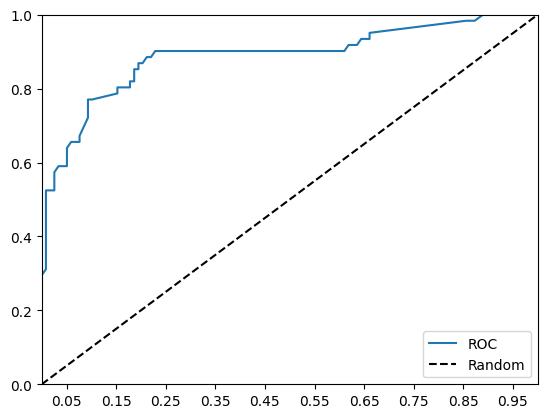

In [15]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random') #k--는 검은색

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR');plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

## sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

In [17]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, pred_proba_class1)
roc_score

0.8883717699360935